<a href="https://colab.research.google.com/github/AlexanderBelfort/MDPRKT/blob/main/AllenMDKL_new_0502.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install AllenNLP Framework and the models.**

In [ ]:
# !pip install allennlp
!pip install allennlp==1.0.0 allennlp-models==1.0.0

**Import the Predictor**

In [30]:
from allennlp.predictors.predictor import Predictor
## Old Model commented
# predictor = Predictor.from_path("https://s3-us-west-2.amazonaws.com/allennlp/models/bidaf-model-2017.09.15-charpad.tar.gz")
predictor = Predictor.from_path("https://storage.googleapis.com/allennlp-public-models/bidaf-model-2020.03.19.tar.gz")


**Open our data.**

In [31]:
with open ("1.txt", "r") as myfile:
  next(myfile)
  data=myfile.read().replace('\n', '')

# data

**Ask questions regarding the study.**

In [54]:
# "How long does ibuprofen take to work?"
# "When does the pain come?"
# "Should they send the patient the questonnaire by post or email?"
# "What is medical management?
# "What is the name of the surgery?"
# "What does the computer do?"

# for 3
# "What is the randomisation outcome?",
# "Will there be surgery?",
# "Will it be medical management?",

result=predictor.predict(
  passage=data,
  question= "When does the pain come?",
  # "how are union territoris managed?"
)


result['best_span_str']

'in the night time'

In [55]:

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

start, end = result["best_span"]
question_tokens = result["question_tokens"]
passage_tokens = result["passage_tokens"]

([<matplotlib.axis.XTick at 0x7fecd0b434a8>,
 [Text(0.5, 0, 'When'),
  Text(1.5, 0, 'does'),
  Text(2.5, 0, 'the'),
  Text(3.5, 0, 'pain'),
  Text(4.5, 0, 'come'),
  Text(5.5, 0, '?')])

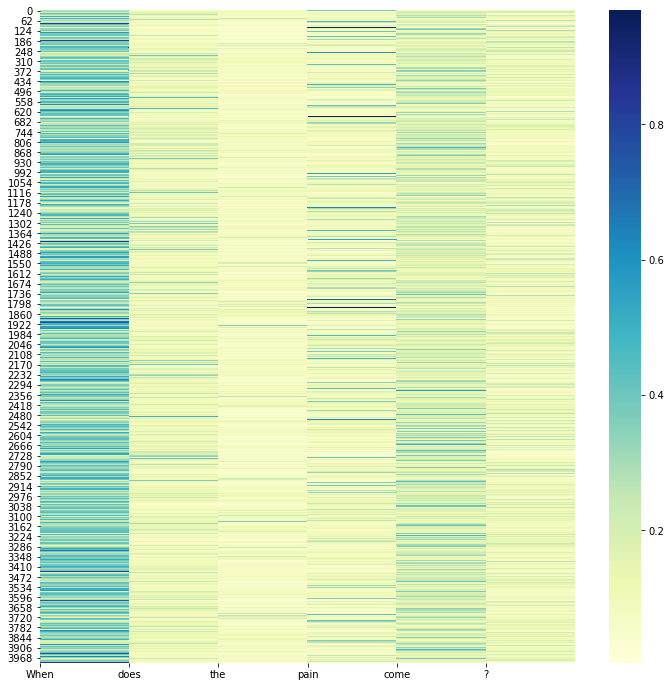

In [56]:
attention = result["passage_question_attention"]

plt.figure(figsize=(12,12))
sns.heatmap(attention, cmap="YlGnBu")
plt.autoscale(enable=True, axis='x')
plt.xticks(np.arange(len(question_tokens)), labels=question_tokens)



In [ ]:
# TESTING

x = ["How long does ibuprofen take to work?",\
     "When does the pain come?",\
     "Should they send the patient the questonnaire by post or email?",\
     "What is medical management?",\
     "What is the name of the surgery?",\
     "What does the computer do?"]

y = [item.strip() for item in x]

def testing(theList):
  
  for each_element in theList:
    result = predictor.predict(passage=data, question = each_element)
    print(result['best_span_str'])

testing(y)

30 minutes or so
in the night time
post
dietary advice and simple painkillers like you have been getting
P2 - What kind of surgery, he says, is required for this?R - So, if we go down the route for surgery, then the surgery is normally keyhole
if you consent to take part in the study, decides what happens to you - whether you get the surgery, or whether you don’t
